In [170]:
import numpy as np
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, precision_score,f1_score, recall_score, accuracy_score
import seaborn as sns
import os as os

path = '/Users/apple/Downloads/data/'
os.chdir(os.path.join(path))
os.getcwd()

loan_df = pd.read_csv('loan_approval_dataset.csv', sep = ',', skipinitialspace= True) # remove blank spaces from columns

In [134]:
print(loan_df.shape)

loan_df.rename(columns= lambda x: x.strip(), inplace= True) # remove spaces in the header
loan_df.columns = loan_df.columns.str.replace(' ', '')
num_cols = [col for col in loan_df.columns if loan_df[col].dtypes == 'int'] # list of numeric cols
cat_cols = [col for col in loan_df.columns if loan_df[col].dtypes == 'O'] # list of categorical cols
cat_cols.remove('loan_status')
print(num_cols)
print(cat_cols)
replace_vals = {'Approved': 1, 
                'Rejected': 0 }
loan_df.replace({'loan_status': replace_vals}, inplace= True) # replace loan status value with 0s & 1s
loan_df['loan_status'] = loan_df['loan_status'].astype(int)
y = pd.DataFrame(loan_df['loan_status'])
X = pd.DataFrame(loan_df.iloc[:, 0:12])

(4269, 13)
['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
['education', 'self_employed']


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.2, random_state= 0)
X_train = X_train.reset_index(drop= True)
X_test = X_test.reset_index(drop= True)
y_train = y_train.reset_index(drop= True)
y_test = y_test.reset_index(drop= True)

(3415, 12)
(854, 12)
(3415, 1)
(854, 1)


In [154]:
One_hot_Encoder = OneHotEncoder(categories= 'auto',
                                drop= 'first',
                                sparse= False)
One_hot_Encoder.fit(X_train[cat_cols])

X_train_transformed = pd.DataFrame(One_hot_Encoder.transform(X_train[cat_cols]))
X_test_transformed = pd.DataFrame(One_hot_Encoder.transform(X_test[cat_cols]))

X_train1 = pd.merge(X_train[num_cols], X_train_transformed, left_index= True, right_index= True)
X_test1 = pd.merge(X_test[num_cols], X_test_transformed, left_index= True, right_index= True)

print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)



(3415, 12)
(854, 12)
(3415, 1)
(854, 1)


In [161]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT_model = DT.fit(X_train1, y_train)
y_pred = DT.predict(X_test1)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [162]:
mean_score = DT.score(X_test1,y_test)
mean_score

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.968384074941452

In [164]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
thresolds

array([2, 1, 0])

In [ ]:
roc_auc_train = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc_train)
    test_pred = dt.predict(X_test1)
    false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, test_pred)
    roc_auc_test = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9

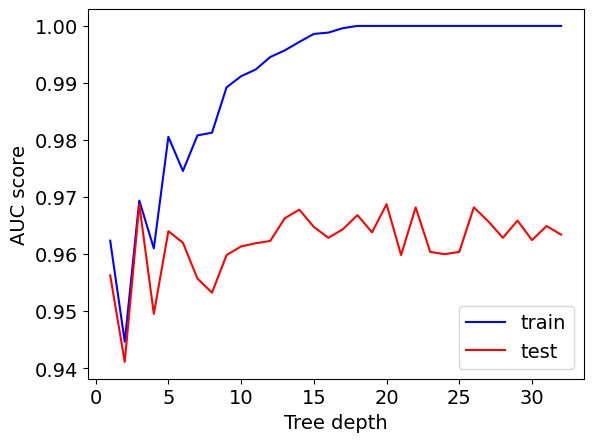

In [177]:
max_depths = np.linspace(1,32,32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train1, y_train)
    train_pred = dt.predict(X_train1)
    false_positive_rate, true_positive_rate, thresolds = roc_curve(y_train, train_pred)
    roc_auc_train = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc_train)
    test_pred = dt.predict(X_test1)
    false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, test_pred)
    roc_auc_test = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc_test)
    
line1, = plt.plot(max_depths, train_results, 'b', label= "Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label= "Test AUC")
plt.legend(['train', 'test'], loc = "lower right")
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()
    

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9

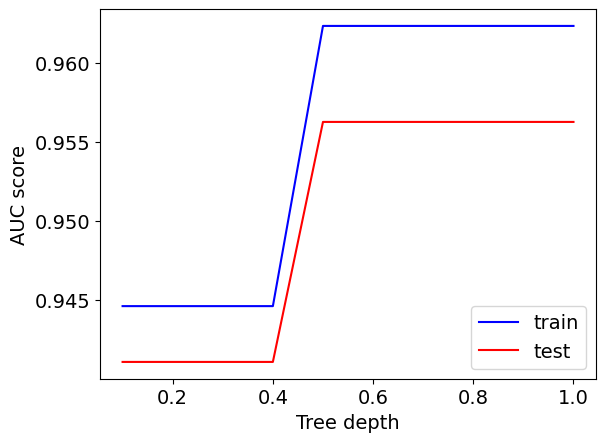

In [182]:
min_sample_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for i in min_sample_splits:
    dt = DecisionTreeClassifier(min_samples_split= i)
    dt.fit(X_train1, y_train)
    train_pred = dt.predict(X_train1)
    false_positive_rate, true_positive_rate, thresolds = roc_curve(y_train, train_pred)
    roc_auc_train = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc_train)
    test_pred = dt.predict(X_test1)
    false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, test_pred)
    roc_auc_test = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc_test)
    
line1, = plt.plot(min_sample_splits, train_results, 'b', label= "Train AUC")
line2, = plt.plot(min_sample_splits, test_results, 'r', label= "Test AUC")
plt.legend(['train', 'test'], loc = "lower right")
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9

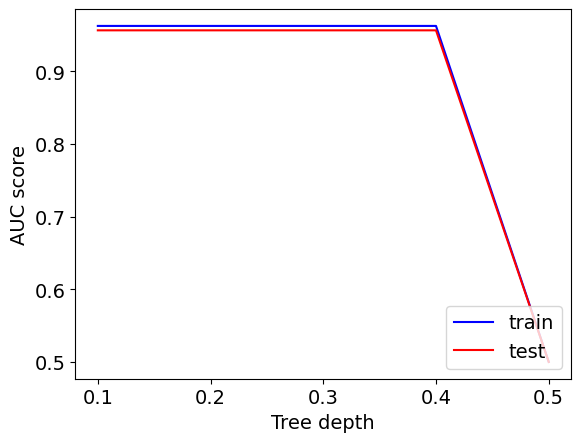

In [186]:
min_samples_leafs = np.linspace(0.1, 0.5, 5 ,endpoint=True)
train_results = []
test_results = []
for i in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf= i)
    dt.fit(X_train1, y_train)
    train_pred = dt.predict(X_train1)
    false_positive_rate, true_positive_rate, thresolds = roc_curve(y_train, train_pred)
    roc_auc_train = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc_train)
    test_pred = dt.predict(X_test1)
    false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, test_pred)
    roc_auc_test = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc_test)
    
line1, = plt.plot(min_samples_leafs, train_results, 'b', label= "Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label= "Test AUC")
plt.legend(['train', 'test'], loc = "lower right")
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9

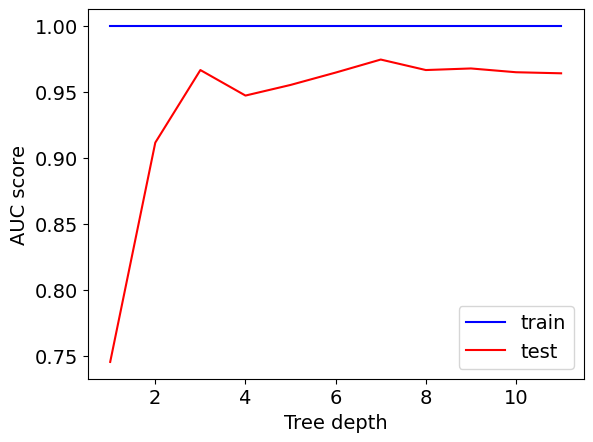

In [187]:
max_features = list(range(1,X_train1.shape[1]))

train_results = []
test_results = []
for i in max_features:
    dt = DecisionTreeClassifier(max_features= i)
    dt.fit(X_train1, y_train)
    train_pred = dt.predict(X_train1)
    false_positive_rate, true_positive_rate, thresolds = roc_curve(y_train, train_pred)
    roc_auc_train = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc_train)
    test_pred = dt.predict(X_test1)
    false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, test_pred)
    roc_auc_test = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc_test)
    
line1, = plt.plot(max_features, train_results, 'b', label= "Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label= "Test AUC")
plt.legend(['train', 'test'], loc = "lower right")
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()